In [393]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import random


In [323]:
#Given file name parse data and return training and testing sets given the wanted percent training data 

def get_data(filename, percent_training, randomize=False):
    data=[]
    with open(filename, "r") as data_import:
        for line in data_import:
            if '?' not in line: 
                data.append(list(map(float, line.split(","))))
    if randomize:
        random.shuffle(data)
    num_training = int(percent_training*len(data))
    target = [i[-1] for i in data]
    data = [i[:-1] for i in data]

    num_ones=0
    for i in range(len(target)):
        if int(target[i])!=0:
            target[i]=1
            num_ones+=1
    return data[:num_training], target[:num_training], data[num_training:], target[num_training:]

# Below is all Code Pertaining to the Cleveland Heart Disease Data Set

In [502]:
#Get data from Cleveland heart dissease data set 
training_data_c, training_target_c, test_data_c, test_target_c = get_data('processed.cleveland.data', 0.8)



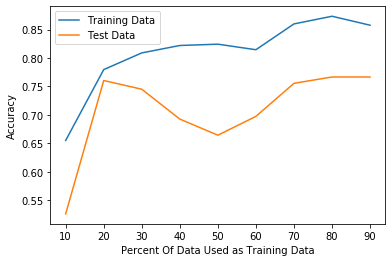

In [498]:
#Break the data set up and see how training and testing accuracy varies depending on quantity test/training data
test_score, training_score=[], []
for i in range(9):
    percent_training=(i+1)/10
    training_data_c, training_target_c, test_data_c, test_target_c = get_data('processed.cleveland.data', percent_training)
    decision_tree_entropy = DecisionTreeClassifier(random_state=0, max_depth=10, criterion="gini", min_samples_leaf=15)
    decision_tree_entropy = decision_tree_entropy.fit(training_data_c, training_target_c)
    training_score.append(decision_tree_entropy.score(training_data_c, training_target_c))
    test_score.append(decision_tree_entropy.score(test_data_c, test_target_c))

x=[10,20,30,40,50,60,70,80,90]

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Percent Of Data Used as Training Data')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



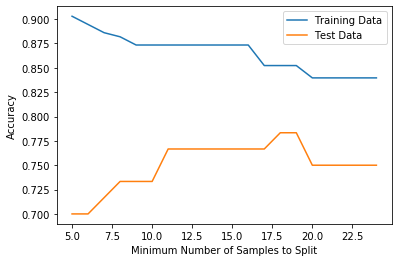

[0.7, 0.7, 0.7166666666666667, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7833333333333333, 0.7833333333333333, 0.75, 0.75, 0.75, 0.75, 0.75]


In [497]:
#Vary the amount of pre-pruning done 

training_data_c, training_target_c, test_data_c, test_target_c = get_data('processed.cleveland.data', 0.8)

test_score, training_score, x=[], [], []

for i in range(20):
    pre_pruning=5+i
    x.append(pre_pruning)
    decision_tree_entropy = DecisionTreeClassifier(random_state=0, max_depth=10, criterion="gini", min_samples_leaf=pre_pruning)
    decision_tree_entropy = decision_tree_entropy.fit(training_data_c, training_target_c)
    training_score.append(decision_tree_entropy.score(training_data_c, training_target_c))
    test_score.append(decision_tree_entropy.score(test_data_c, test_target_c))

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Minimum Number of Samples to Split')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 

print(test_score)
    
    

1.0 0.7
0.9962546816479401 0.7
0.9925093632958801 0.7
0.9887640449438202 0.7
0.9850187265917603 0.7
0.9812734082397003 0.7
0.9775280898876404 0.7
0.9737827715355806 0.7
0.9662921348314607 0.7
0.9588014981273408 0.7
0.9438202247191011 0.7
0.9438202247191011 0.7
0.9363295880149812 0.7
0.9325842696629213 0.7
0.9288389513108615 0.7333333333333333
0.9176029962546817 0.7333333333333333
0.9176029962546817 0.7333333333333333
0.9063670411985019 0.7333333333333333
0.898876404494382 0.7333333333333333
0.8838951310861424 0.7333333333333333
0.8801498127340824 0.7333333333333333
0.8651685393258427 0.7666666666666667
0.8576779026217228 0.7666666666666667
0.8576779026217228 0.7666666666666667
0.8239700374531835 0.7666666666666667
0.8164794007490637 0.7666666666666667
0.7640449438202247 0.7666666666666667
0.5543071161048689 0.4


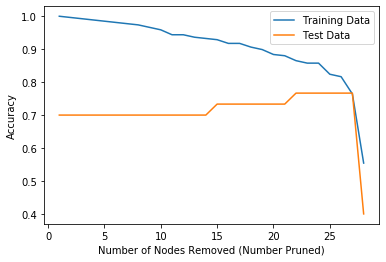

In [496]:
#Vary the amount of post-pruning done. Graph success after each node pruned 
decision_tree = DecisionTreeClassifier(random_state=0) 
decision_tree = decision_tree.cost_complexity_pruning_path(training_data_c, training_target_c) 
trees=[]
for ccp_alpha in decision_tree.ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha , criterion="gini")
    clf.fit(training_data_c, training_target_c)
    trees.append(clf)

training_score, test_score=[],[]
for tree in trees:
    print(tree.score(training_data_c, training_target_c), tree.score(test_data_c, test_target_c))
    training_score.append(tree.score(training_data_c, training_target_c))
    test_score.append(tree.score(test_data_c, test_target_c))

x=np.arange(1, len(training_score)+1)

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')
plt.legend()
plt.xlabel('Number of Nodes Removed (Number Pruned)')
plt.ylabel('Accuracy')
plt.show()


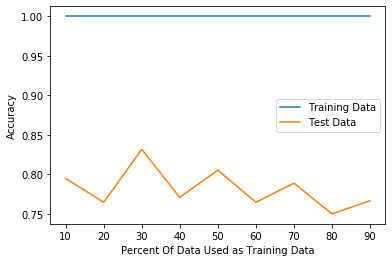

In [506]:
#Vary quantity of samples used for training when using a random forest. 

test_score, training_score=[], []
for i in range(9):
    percent_training=(i+1)/10
    training_data_c, training_target_c, test_data_c, test_target_c = get_data('processed.cleveland.data', percent_training)
    random_forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=50, max_features='sqrt')
    random_forest.fit(training_data_c, training_target_c)
    training_score.append(random_forest.score(training_data_c, training_target_c))
    test_score.append(random_forest.score(test_data_c, test_target_c))

x=[10,20,30,40,50,60,70,80,90]

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Percent Of Data Used as Training Data')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



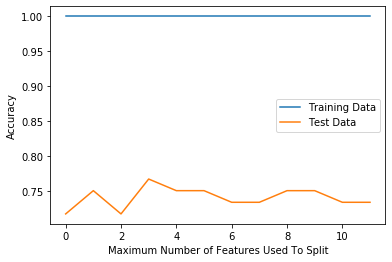

[0.7166666666666667, 0.75, 0.7166666666666667, 0.7666666666666667, 0.75, 0.75, 0.7333333333333333, 0.7333333333333333, 0.75, 0.75, 0.7333333333333333, 0.7333333333333333]


In [504]:
# Vary the number of features used per tree in the random forest 

training_score, test_score, x=[], [], []
for i in range(12):
    random_forest = RandomForestClassifier(random_state=0, criterion="entropy", max_features=(i+2), n_estimators=50)
    random_forest.fit(training_data_c, training_target_c)
    training_score.append(random_forest.score(training_data_c, training_target_c))
    test_score.append(random_forest.score(test_data_c, test_target_c))
    x.append(i)

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Maximum Number of Features Used To Split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(test_score)

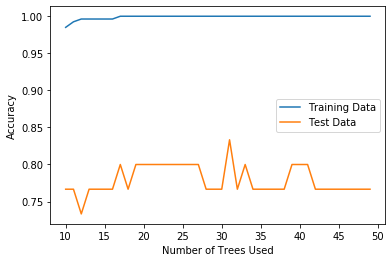

[0.7666666666666667, 0.7666666666666667, 0.7333333333333333, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.8, 0.7666666666666667, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.8333333333333334, 0.7666666666666667, 0.8, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.8, 0.8, 0.8, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667]


In [510]:
#Vary the number of trees used in the random forest 

training_score, test_score, x=[], [], []
for i in range(40):
    random_forest = RandomForestClassifier(random_state=0, criterion="entropy", max_features=3, n_estimators=10+i)
    random_forest.fit(training_data_c, training_target_c)
    training_score.append(random_forest.score(training_data_c, training_target_c))
    test_score.append(random_forest.score(test_data_c, test_target_c))
    x.append(i+10)

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Number of Trees Used')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(test_score)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

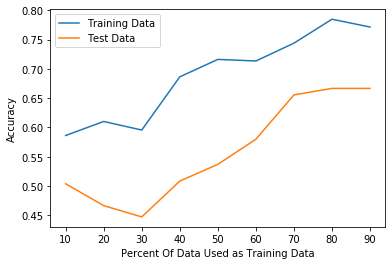

In [544]:
#vary the amount of training data used in the neural network 

test_score, training_score=[], []
for i in range(9):
    percent_training=(i+1)/10
    training_data_c, training_target_c, test_data_c, test_target_c = get_data('processed.cleveland.data', percent_training)
    neural_network = MLPClassifier(solver='sgd', random_state=0, hidden_layer_sizes=(50), learning_rate_init=0.00001)
    neural_network = neural_network.fit(training_data_c, training_target_c)
    training_score.append(neural_network.score(training_data_c, training_target_c))
    test_score.append(neural_network.score(test_data_c, test_target_c))

x=[10,20,30,40,50,60,70,80,90]

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Percent Of Data Used as Training Data')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

[0.6666666666666666, 0.6666666666666666, 0.6333333333333333, 0.5666666666666667, 0.6666666666666666, 0.5, 0.5, 0.6666666666666666, 0.6, 0.5]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


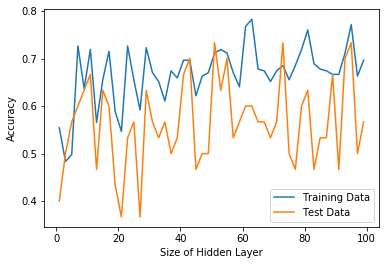

In [560]:
#Vary the size of the hiden layer in the neural network 

test_score, training_score,x=[], [], []
for i in range(50):
    neural_network = MLPClassifier(solver='sgd', random_state=0, hidden_layer_sizes=(1+2*i), learning_rate_init=0.00001)
    neural_network.fit(training_data_c, training_target_c)
    training_score.append(neural_network.score(training_data_c, training_target_c))
    test_score.append(neural_network.score(test_data_c, test_target_c))    
    x.append(1+2*i)
print(neural_score)

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Size of Hidden Layer')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.7, 0.7, 0.7, 0.5, 0.5333333333333333, 0.6666666666666666, 0.5666666666666667, 0.5, 0.6333333333333333, 0.5, 0.4, 0.4666666666666667, 0.5, 0.5333333333333333, 0.5, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6666666666666666, 0.6333333333333333, 0.6333333333333333, 0.6666666666666666, 0.7333333333333333, 0.5666666666666667, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6666666666666666, 0.7, 0.7, 0.6666666666666666, 0.6333333333333333, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]


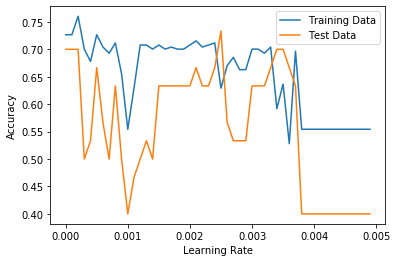

In [566]:
#Vary the learning rate 
test_score, training_score,x=[], [], []
for i in range(50):
    neural_network = MLPClassifier(solver='sgd', random_state=0, hidden_layer_sizes=(50), learning_rate_init=15*(i+1)*0.00001)
    neural_network.fit(training_data_c, training_target_c)
    training_score.append(neural_network.score(training_data_c, training_target_c))
    test_score.append(neural_network.score(test_data_c, test_target_c))    
    x.append(10*i*0.00001)
print(test_score)

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

[0.8, 0.7666666666666667, 0.7666666666666667, 0.6666666666666666, 0.6666666666666666, 0.6333333333333333, 0.5, 0.5, 0.6333333333333333, 0.5, 0.4, 0.5666666666666667, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6666666666666666, 0.6333333333333333, 0.6333333333333333, 0.6666666666666666, 0.6666666666666666, 0.6333333333333333, 0.6666666666666666, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.5333333333333333, 0.5, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]


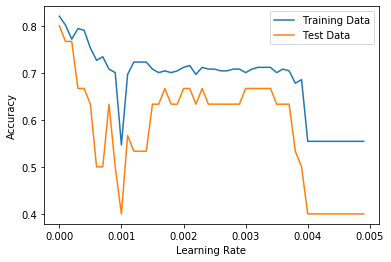

In [568]:
#Change learning rate to adaptive and vary learning rate 
test_score, training_score,x=[], [], []
for i in range(50):
    neural_network = MLPClassifier(solver='sgd', learning_rate='adaptive', random_state=0, hidden_layer_sizes=(50), learning_rate_init=15*(i+1)*0.00001)
    neural_network.fit(training_data_c, training_target_c)
    training_score.append(neural_network.score(training_data_c, training_target_c))
    test_score.append(neural_network.score(test_data_c, test_target_c))    
    x.append(10*i*0.00001)
print(test_score)

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

[0.43333333333333335, 0.6333333333333333, 0.7333333333333333, 0.8, 0.8, 0.8, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.8, 0.7666666666666667, 0.8, 0.8, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.8, 0.8, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7333333333333333, 0.8333333333333334, 0.8333333333333334, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.8, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.8, 0.8333333333333334, 0.7666666666666667, 0.7666666666666667, 0.8333333333333334, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.8]


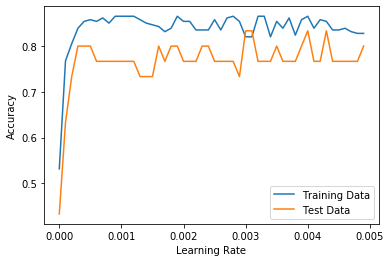

In [569]:
#Try the adam solver 
test_score, training_score,x=[], [], []
for i in range(50):
    neural_network = MLPClassifier(solver='adam', random_state=0, hidden_layer_sizes=(50), learning_rate_init=15*(i+1)*0.00001)
    neural_network.fit(training_data_c, training_target_c)
    training_score.append(neural_network.score(training_data_c, training_target_c))
    test_score.append(neural_network.score(test_data_c, test_target_c))    
    x.append(10*i*0.00001)
print(test_score)

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Below is all Code Pertaining to the Banknote Authentication Data Set

In [447]:
#Get data, rerunning this cell will change the order of data, and thus results (since order is randomzied)! 

training_data, training_target, test_data, test_target = get_data('data_banknote_authentication.txt', 0.8, True)


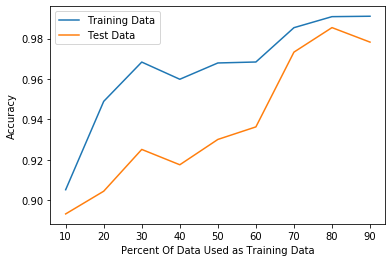

[0.8931174089068826, 0.9043715846994536, 0.9250780437044746, 0.9174757281553398, 0.9300291545189504, 0.936247723132969, 0.9733009708737864, 0.9854545454545455, 0.9782608695652174]


In [440]:
#Vary number of samples used in training, decision tree 

data=training_data+test_data
target=training_target+test_target

test_score, training_score=[], []
for i in range(9):
    endpoint=int((i+1)*len(data)/10)
    decision_tree_entropy = DecisionTreeClassifier(random_state=0, max_depth=10, criterion="gini", min_samples_leaf=10)
    decision_tree_entropy = decision_tree_entropy.fit(data[:endpoint], target[:endpoint])
    training_score.append(decision_tree_entropy.score(data[:endpoint], target[:endpoint]))
    test_score.append(decision_tree_entropy.score(data[endpoint:], target[endpoint:]))

x=[10,20,30,40,50,60,70,80,90]

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Percent Of Data Used as Training Data')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(test_score)



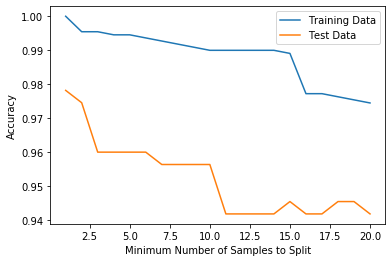

[0.9781818181818182, 0.9745454545454545, 0.96, 0.96, 0.96, 0.96, 0.9563636363636364, 0.9563636363636364, 0.9563636363636364, 0.9563636363636364, 0.9418181818181818, 0.9418181818181818, 0.9418181818181818, 0.9418181818181818, 0.9454545454545454, 0.9418181818181818, 0.9418181818181818, 0.9454545454545454, 0.9454545454545454, 0.9418181818181818]


In [448]:
#Vary the amount of pre pruning, decision tree 
test_score, training_score, x=[], [], []

for i in range(20):
    pre_pruning=i+1
    x.append(pre_pruning)
    decision_tree_entropy = DecisionTreeClassifier(random_state=0, max_depth=10, criterion="gini", min_samples_leaf=pre_pruning)
    decision_tree_entropy = decision_tree_entropy.fit(training_data, training_target)
    training_score.append(decision_tree_entropy.score(training_data, training_target))
    test_score.append(decision_tree_entropy.score(test_data, test_target))

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Minimum Number of Samples to Split')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 

print(test_score)
    

1.0 0.9781818181818182
0.9990884229717412 0.9709090909090909
0.9972652689152234 0.9709090909090909
0.9963536918869644 0.9672727272727273
0.9954421148587056 0.96
0.9945305378304466 0.96
0.9899726526891522 0.9418181818181818
0.9772105742935278 0.9418181818181818
0.9617137648131268 0.92
0.9443938012762079 0.9127272727272727
0.9243391066545124 0.9127272727272727
0.894257064721969 0.8981818181818182
0.8568824065633546 0.84
0.5542388331814039 0.56


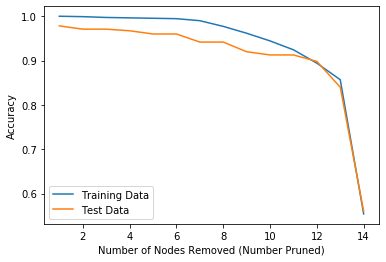

In [449]:
#Vary the amount of post pruning, decision tree 

decision_tree = DecisionTreeClassifier(random_state=0) #can also use gini
decision_tree = decision_tree.cost_complexity_pruning_path(training_data, training_target) 
trees=[]
for ccp_alpha in decision_tree.ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha , criterion="gini")
    clf.fit(training_data, training_target)
    trees.append(clf)

training_score, test_score=[],[]
for tree in trees:
    print(tree.score(training_data, training_target), tree.score(test_data, test_target))
    training_score.append(tree.score(training_data, training_target))
    test_score.append(tree.score(test_data, test_target))

x=np.arange(1, len(training_score)+1)

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')
plt.legend()
plt.xlabel('Number of Nodes Removed (Number Pruned)')
plt.ylabel('Accuracy')
plt.show()


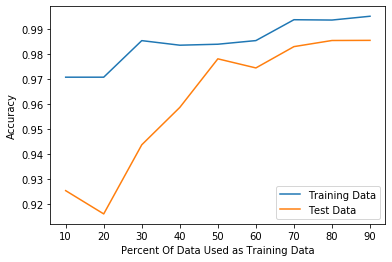

[0.9255060728744939, 0.9162112932604736, 0.9438085327783559, 0.9587378640776699, 0.978134110787172, 0.9744990892531876, 0.9830097087378641, 0.9854545454545455, 0.9855072463768116]


In [528]:
#Vary the number of samples used for training, random forest 

data=training_data+test_data
target=training_target+test_target

test_score, training_score=[], []
for i in range(9):
    endpoint=int((i+1)*len(data)/10)
    random_forest = RandomForestClassifier(random_state=0, max_depth=10, criterion="gini", min_samples_leaf=10)
    random_forest = random_forest.fit(data[:endpoint], target[:endpoint])
    training_score.append(random_forest.score(data[:endpoint], target[:endpoint]))
    test_score.append(random_forest.score(data[endpoint:], target[endpoint:]))

x=[10,20,30,40,50,60,70,80,90]

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Percent Of Data Used as Training Data')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(test_score)




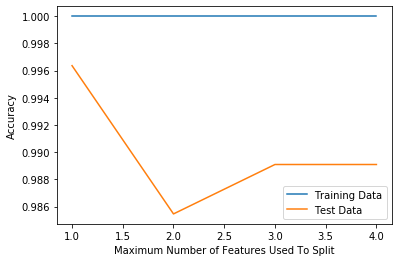

[0.9963636363636363, 0.9854545454545455, 0.9890909090909091, 0.9890909090909091]


In [531]:
#Vary the number of features used in each tree, random forest 

training_score, test_score, x=[], [], []
for i in range(4):
    random_forest = RandomForestClassifier(random_state=0, criterion="entropy", max_features=(i+1), n_estimators=50)
    random_forest.fit(training_data, training_target)
    training_score.append(random_forest.score(training_data, training_target))
    test_score.append(random_forest.score(test_data, test_target))
    x.append(i+1)

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Maximum Number of Features Used To Split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(test_score)

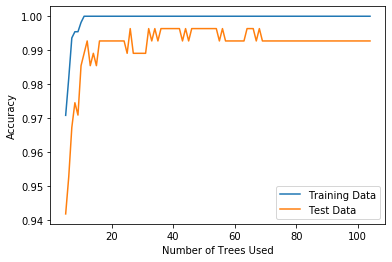

[0.9418181818181818, 0.9527272727272728, 0.9672727272727273, 0.9745454545454545, 0.9709090909090909, 0.9854545454545455, 0.9890909090909091, 0.9927272727272727, 0.9854545454545455, 0.9890909090909091, 0.9854545454545455, 0.9927272727272727, 0.9927272727272727, 0.9927272727272727, 0.9927272727272727, 0.9927272727272727, 0.9927272727272727, 0.9927272727272727, 0.9927272727272727, 0.9927272727272727, 0.9890909090909091, 0.9963636363636363, 0.9890909090909091, 0.9890909090909091, 0.9890909090909091, 0.9890909090909091, 0.9890909090909091, 0.9963636363636363, 0.9927272727272727, 0.9963636363636363, 0.9927272727272727, 0.9963636363636363, 0.9963636363636363, 0.9963636363636363, 0.9963636363636363, 0.9963636363636363, 0.9963636363636363, 0.9963636363636363, 0.9927272727272727, 0.9963636363636363, 0.9927272727272727, 0.9963636363636363, 0.9963636363636363, 0.9963636363636363, 0.9963636363636363, 0.9963636363636363, 0.9963636363636363, 0.9963636363636363, 0.9963636363636363, 0.9963636363636363,

In [533]:
#Vary the number of trees used in the forest 

training_score, test_score, x=[], [], []
for i in range(100):
    random_forest = RandomForestClassifier(random_state=0, criterion="entropy", max_features=1, n_estimators=1+i)
    random_forest.fit(training_data, training_target)
    training_score.append(random_forest.score(training_data, training_target))
    test_score.append(random_forest.score(test_data, test_target))
    x.append(i+5)

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Number of Trees Used')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(test_score)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

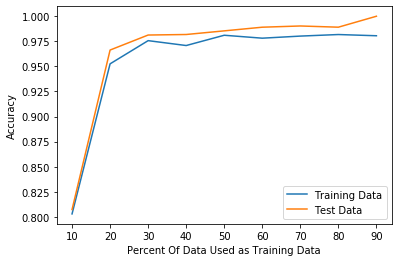

In [580]:
#Vary the quantity of training data, neural network 

test_score, training_score=[], []
data=training_data+test_data
target=training_target+test_target
for i in range(9):
    endpoint=int((i+1)*len(data)/10)
    neural_network = MLPClassifier(solver='sgd', random_state=0, hidden_layer_sizes=(50), learning_rate_init=0.0001)
    neural_network = neural_network.fit(data[:endpoint], target[:endpoint])
    training_score.append(neural_network.score(data[:endpoint], target[:endpoint]))
    test_score.append(neural_network.score(data[endpoint:], target[endpoint:]))

x=[10,20,30,40,50,60,70,80,90]

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Percent Of Data Used as Training Data')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

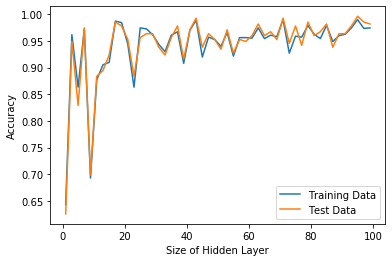

[0.6254545454545455, 0.9490909090909091, 0.8290909090909091, 0.9745454545454545, 0.6981818181818182, 0.8836363636363637, 0.8945454545454545, 0.9236363636363636, 0.9854545454545455, 0.9781818181818182, 0.9527272727272728, 0.8836363636363637, 0.9563636363636364, 0.9636363636363636, 0.9636363636363636, 0.9381818181818182, 0.9236363636363636, 0.9563636363636364, 0.9781818181818182, 0.9163636363636364, 0.9709090909090909, 0.9927272727272727, 0.9381818181818182, 0.9636363636363636, 0.9527272727272728, 0.9345454545454546, 0.9709090909090909, 0.9272727272727272, 0.9527272727272728, 0.9490909090909091, 0.96, 0.9818181818181818, 0.96, 0.9672727272727273, 0.9527272727272728, 0.9927272727272727, 0.9454545454545454, 0.9781818181818182, 0.9418181818181818, 0.9854545454545455, 0.96, 0.9672727272727273, 0.9818181818181818, 0.9381818181818182, 0.9636363636363636, 0.9636363636363636, 0.9781818181818182, 0.9963636363636363, 0.9854545454545455, 0.9818181818181818]


In [582]:
#Vary the size of the hidden layer, neural network 

test_score, training_score,x=[], [], []
for i in range(50):
    neural_network = MLPClassifier(solver='sgd', random_state=0, hidden_layer_sizes=(1+2*i), learning_rate_init=0.0001)
    neural_network.fit(training_data, training_target)
    training_score.append(neural_network.score(training_data, training_target))
    test_score.append(neural_network.score(test_data, test_target))    
    x.append(1+2*i)

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Size of Hidden Layer')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(test_score)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

[0.9890909090909091, 0.9890909090909091, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


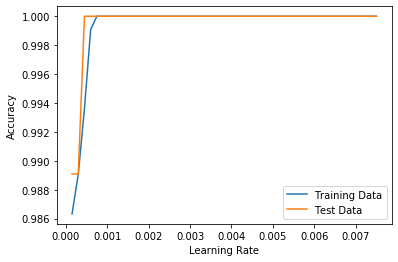

In [591]:
#Vary the learning rate, neural network (also switch between 'adaptive' and linear learning rate)

test_score, training_score,x=[], [], []
for i in range(50):
    neural_network = MLPClassifier(solver='sgd', learning_rate='adaptive', random_state=0, hidden_layer_sizes=(44), learning_rate_init=15*(i+1)*0.00001)
    neural_network.fit(training_data, training_target)
    training_score.append(neural_network.score(training_data, training_target))
    test_score.append(neural_network.score(test_data, test_target))    
    x.append(15*(i+1)*0.00001)
print(test_score)

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
#Change solver to adam 

test_score, training_score,x=[], [], []
for i in range(50):
    neural_network = MLPClassifier(solver='adam', random_state=0, hidden_layer_sizes=(50), learning_rate_init=15*(i+1)*0.00001)
    neural_network.fit(training_data_c, training_target_c)
    training_score.append(neural_network.score(training_data_c, training_target_c))
    test_score.append(neural_network.score(test_data_c, test_target_c))    
    x.append(10*i*0.00001)
print(test_score)

plt.plot(x, training_score, label='Training Data')

plt.plot(x, test_score, label='Test Data')

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()





# Conclusion Graph

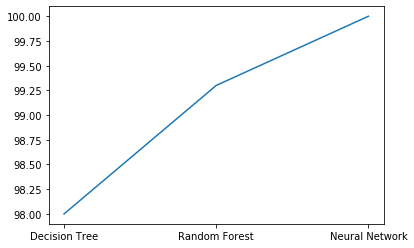

In [592]:
x = ['Decision Tree', 'Random Forest', 'Neural Network']
heart = [76, 83.3, 83.3]
banknote= [98, 99.3, 100]

plt.plot(x, banknote)
#plt.plot(x, heart)

plt.show()
